<a href="https://colab.research.google.com/github/miad52/Python_UTEC/blob/main/Sesi%C3%B3n_II_Ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

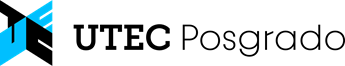

# EJEMPLOS
# **<font color='lightcoral'>Módulo 3 - Sesión 2</font>**
## <font color='#80b1d3'> Profesor: Germain Garcia Zanabria</font>



---



### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso. Si necesitas ayuda o tienes alguna pregunta, no dudes en levantar la mano para que pueda asistirte.


[Generación de random](https://realpython.com/python-random/)

# **Números aleatorios**

In [ ]:
# Numpy es nuestra librería de generación de números aleatorios
import numpy as np

In [ ]:
# un número aleatorio entero entre a y b
a = 1
b = 6
np.random.randint(a,b+1)

In [ ]:
# 20 números aleatorio entero entre a y b
a = 1
b = 6
np.random.randint(a,b+1,20)

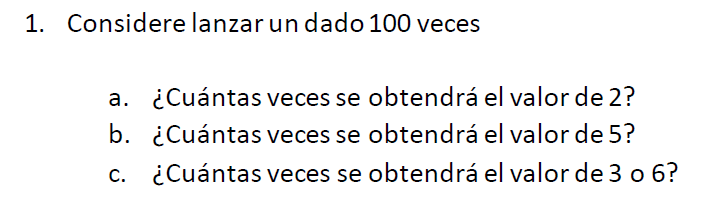

In [ ]:
# Resolver generar 100 posibles lanzamientos
lanzamientos = np.random.randint(1,6+1,100)
lanzamientos

In [ ]:
(lanzamientos == 2)

In [ ]:
#Pregunta a
resultado_2 = (lanzamientos == 2)
print("La cantidad de veces que se obtuvo 2 es:", np.sum(resultado_2))

In [ ]:
#Pregunta b
resultado_5 = (lanzamientos == 5)
print("La cantidad de veces que se obtuvo 5 es:", np.sum(resultado_5))

In [ ]:
#Pregunta c
resultado_3_6 = (lanzamientos == 3) + (lanzamientos == 6)
print("La cantidad de veces que se obtuvo 3 o 6 es:", np.sum(resultado_3_6))

# Ejemplo 1: Crea una gráfica que muestre la evolución de los ingresos, gastos y beneficios a lo largo del tiempo.
Realiza una simulación simple de un modelo financiero para una empresa. Este modelo incluye ingresos, gastos y beneficios, y predice la rentabilidad futura durante un período de tiempo.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Listas

In [ ]:
#Generación de datos
# Parámetros iniciales
anio_inicial = 2024
periodo = 10                        # número de años de la simulación
ingresos_iniciales = 100000         # ingresos iniciales en dólares 100 000
gastos_iniciales = 60000            # gastos iniciales en dólares 60 000
tasa_crecimiento_ingresos = 0.05    # crecimiento anual de ingresos (5%)
tasa_crecimiento_gastos = 0.03      # crecimiento anual de gastos (3%)

# Generar los datos de simulación
anios =       [anio_inicial + i for i in range(periodo)]

ingresos =    [ingresos_iniciales * (1 + tasa_crecimiento_ingresos) ** i for i in range(periodo)]

gastos =      [gastos_iniciales * (1 + tasa_crecimiento_gastos) ** i for i in range(periodo)]

beneficios =  [ingresos[i] - gastos[i] for i in range(periodo)]

# Crear un DataFrame
df = pd.DataFrame({
    'Año': anios,
    'Ingresos': ingresos,
    'Gastos': gastos,
    'Beneficios': beneficios
})


df.head()


df.to_csv('ej1_modelo_financiero_simulacion.csv', index=False) # podemos guardar nuestros datos simulados

In [ ]:
df.head()

In [ ]:
# usar dataframe o cargar datos de csv

# Visualización de los resultados
plt.figure(figsize=(10, 6))

plt.plot(df['Año'], df['Ingresos'], label='Ingresos', marker='o')
plt.plot(df['Año'], df['Gastos'], label='Gastos', marker='o')
plt.plot(df['Año'], df['Beneficios'], label='Beneficios', marker='o')

plt.title('Simulación del Modelo Financiero')
plt.xlabel('Año')
plt.ylabel('Monto en dólares')
plt.legend()
plt.grid(True)
plt.show()


# Ejemplo 2: Simulación de colas
Simular la operación de un dia en una tienda para prever el tiempo de espera de los clientes bajo diferentes cantidades de cajeros y horarios de apertura.


In [ ]:
#a = np.random.exponential(TIEMPO_MEDIO_LLEGADA, NUMERO_CLIENTES)
#print(a)
#tiempos_llegada = np.cumsum(a)
#print(tiempos_llegada)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#animación
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='jshtml')
#fin animación

NUMERO_CLIENTES = 10      # Número de clientes en la simulación
TIEMPO_MEDIO_LLEGADA = 5  # Tiempo medio entre llegadas de clientes en segundos
TIEMPO_MEDIO_SERVICIO = 8 # Tiempo medio de servicio por cliente en segundos

# Generar tiempos de llegada y servicio usando distribuciones exponenciales
tiempos_llegada = np.cumsum(np.random.exponential(TIEMPO_MEDIO_LLEGADA, NUMERO_CLIENTES))
tiempos_servicio = np.random.exponential(TIEMPO_MEDIO_SERVICIO, NUMERO_CLIENTES)

# Variables para la simulación
tiempos_espera = np.zeros(NUMERO_CLIENTES)
tiempo_liberacion_cajero = 0  # Tiempo en que el cajero estará libre
estados = []


for i in range(NUMERO_CLIENTES):
    if tiempos_llegada[i] < tiempo_liberacion_cajero:
        tiempos_espera[i] = tiempo_liberacion_cajero - tiempos_llegada[i]
    else:
        tiempos_espera[i] = 0

    tiempo_liberacion_cajero = max(tiempos_llegada[i], tiempo_liberacion_cajero) + tiempos_servicio[i]

    # Guardar el estado actual para la animación
    estados.append((tiempos_llegada[i], tiempos_espera[i], tiempo_liberacion_cajero))

In [ ]:
print(tiempos_espera)
# tiempo de espera prmedio
tiempo_espera_promedio = np.mean(tiempos_espera)

In [ ]:


# Resultados de la simulación
print(f"Promedio de tiempo de espera: {tiempo_espera_promedio:.2f} segundos")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, max(tiempos_llegada) + max(tiempos_servicio))
ax.set_ylim(0, NUMERO_CLIENTES + 1)
ax.set_xlabel('Tiempo (segundos)')
ax.set_ylabel('Número de Clientes')
ax.set_title('Simulación de Cola en un Banco')

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))


def init(): # Función de inicialización para la animación
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def update(frame): # Función de actualización para la animación
    current_time = estados[frame][0]
    clientes_atendidos = frame + 1
    line.set_data(tiempos_llegada[:clientes_atendidos], np.arange(1, clientes_atendidos + 1))
    time_text.set_text(f'Tiempo: {current_time:.2f} segundos')
    return line, time_text

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(estados), init_func=init, blit=True, interval=500, repeat=False)

#plt.show()
plt.close()
ani
# Show the animation
#HTML(ani.to_html5_video())

# Ejemplo 3: Simulación de modelo de tráfico vehicular en relación a  condiciones meteorológicas
Simula un modelo de tráfico vehicular considerando variables como el número de coches, la duración de los semáforos y las condiciones meteorológicas.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#animación
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='jshtml')
#fin de animación

NUMERO_COHES = 100             # Número de coches en la simulación
DURACION_SEMAFORO_VERDE = 60    # Duración del semáforo en verde en segundos
DURACION_SEMAFORO_ROJO = 60     # Duración del semáforo en rojo en segundos
DURACION_SIMULACION = 3600      # Duración de la simulación en segundos (1 hora)
TIEMPO_MEDIO_LLEGADA_COHES = 5  # Tiempo medio de llegada de coches en segundos

# Condiciones meteorológicas (0 = despejado, 1 = lluvia, 2 = nieve)
CONDICIONES_METEOROLOGICAS = ['despejado', 'lluvia', 'nieve']
EFECTO_METEO = {'despejado': 1.0, 'lluvia': 1.5, 'nieve': 2.0}


def simular_trafico(condicion_meteorologica):
    tiempo_actual = 0
    coches_en_cola = 0
    tiempo_espera_total = 0
    tiempo_semaforo = 0
    semaforo_verde = True
    coches_atendidos = 0

    tiempo_llegada_coches = np.random.exponential(TIEMPO_MEDIO_LLEGADA_COHES, NUMERO_COHES)
    indice_llegada = 0
    estados = []

    while tiempo_actual < DURACION_SIMULACION and indice_llegada < NUMERO_COHES:
        # Llegada de coches
        if tiempo_actual >= sum(tiempo_llegada_coches[:indice_llegada + 1]): # Si es momento que llegue el siguiente coche
            coches_en_cola += 1
            indice_llegada += 1

        # Cambio de semáforo
        if semaforo_verde and tiempo_semaforo >= DURACION_SEMAFORO_VERDE:
            semaforo_verde = False
            tiempo_semaforo = 0
        elif not semaforo_verde and tiempo_semaforo >= DURACION_SEMAFORO_ROJO:
            semaforo_verde = True
            tiempo_semaforo = 0

        # Atención de coches
        if semaforo_verde and coches_en_cola > 0:
            coches_atendidos += 1
            tiempo_espera_total += (tiempo_actual - sum(tiempo_llegada_coches[:indice_llegada - coches_en_cola]))
            coches_en_cola -= 1

        tiempo_semaforo += 1
        tiempo_actual += 1 * EFECTO_METEO[condicion_meteorologica]
        estados.append((tiempo_actual, coches_en_cola, semaforo_verde, coches_atendidos))

    tiempo_espera_promedio = tiempo_espera_total / coches_atendidos if coches_atendidos > 0 else 0
    return tiempo_espera_promedio, coches_atendidos,estados

In [ ]:
# Ejecutar la simulación para cada condición meteorológica
resultados = {}
for condicion in CONDICIONES_METEOROLOGICAS:
    tiempo_espera_promedio, coches_atendidos,estados = simular_trafico(condicion)
    resultados[condicion] = {'tiempo_espera_promedio': tiempo_espera_promedio, 'coches_atendidos': coches_atendidos}
    print(f"Condición meteorológica: {condicion}")
    print(f"  Tiempo de espera promedio: {tiempo_espera_promedio:.2f} segundos")
    print(f"  Coches atendidos: {coches_atendidos}")

In [ ]:
# Graficar los resultados
condiciones = list(resultados.keys())
tiempos_espera_promedio = [resultados[condicion]['tiempo_espera_promedio'] for condicion in condiciones]

plt.figure(figsize=(10, 6))
plt.bar(condiciones, tiempos_espera_promedio, color=['blue', 'green', 'red'])
plt.title('Tiempo de Espera Promedio vs Condiciones Meteorológicas')
plt.xlabel('Condiciones Meteorológicas')
plt.ylabel('Tiempo de Espera Promedio (segundos)')
plt.grid(True)
plt.show()

# Explicación distribución exponencial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para la distribución exponencial
TIEMPO_MEDIO_LLEGADA_COHES = 5  # Tiempo medio de llegada en minutos
NUMERO_COHES = 1000  # Número de muestras a generar

# Generar datos con distribución exponencial
tiempo_llegada_coches = np.random.exponential(TIEMPO_MEDIO_LLEGADA_COHES, NUMERO_COHES)
#print(tiempo_llegada_coches)

# Crear el gráfico de la distribución
plt.figure(figsize=(10, 6))
plt.hist(tiempo_llegada_coches, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de Tiempos de Llegada de Coches (Exponencial)')
plt.xlabel('Tiempo de Llegada (minutos)')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.show()


 Agregamos simulación

In [ ]:
#CONDICIONES_METEOROLOGICAS = ['despejado', 'lluvia', 'nieve']
#EFECTO_METEO = {'despejado': 1.0, 'lluvia': 1.5, 'nieve': 2.0}
# ejemplo: 'despejado'
import matplotlib.animation as animation
condicion = 'despejado'
tiempo_espera, coches_atendidos, estados = simular_trafico(condicion)


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, DURACION_SIMULACION)
ax.set_ylim(0, NUMERO_COHES)
ax.set_xlabel('Tiempo (segundos)')
ax.set_ylabel('Número de coches en cola')
ax.set_title(f'Simulación de Tráfico - Condición: {condicion.capitalize()}')

line, = ax.plot([], [], lw=2)
semaforo_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))


def init():
    line.set_data([], [])
    semaforo_text.set_text('')
    return line, semaforo_text

# Función de actualización para la animación
def update(frame):
    tiempo_actual, coches_en_cola, semaforo_verde, coches_atendidos = estados[frame]
    line.set_data(range(frame), [estado[1] for estado in estados[:frame]])
    semaforo_text.set_text(f'Semáforo: {"Verde" if semaforo_verde else "Rojo"}')
    semaforo_text.set_color('green' if semaforo_verde else 'red')
    return line, semaforo_text

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(estados), init_func=init, blit=True, interval=50, repeat=False)

#plt.show()
plt.close()
#plt.show()
ani